# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Type your code here
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
#Dataset Loading
BankTrans = pd.read_csv('https://raw.githubusercontent.com/RizkiYanuar-Tech/Dataset/refs/heads/main/bank_transactions_data_2.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
BankTrans.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [4]:
#Type your code here
BankTrans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [5]:
BankTrans.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [6]:
BankTrans.isna().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [7]:
#Check jumlah data duplikat
BankTrans.duplicated().sum()

np.int64(0)

### **Check Outlier Pada Data Numerik**

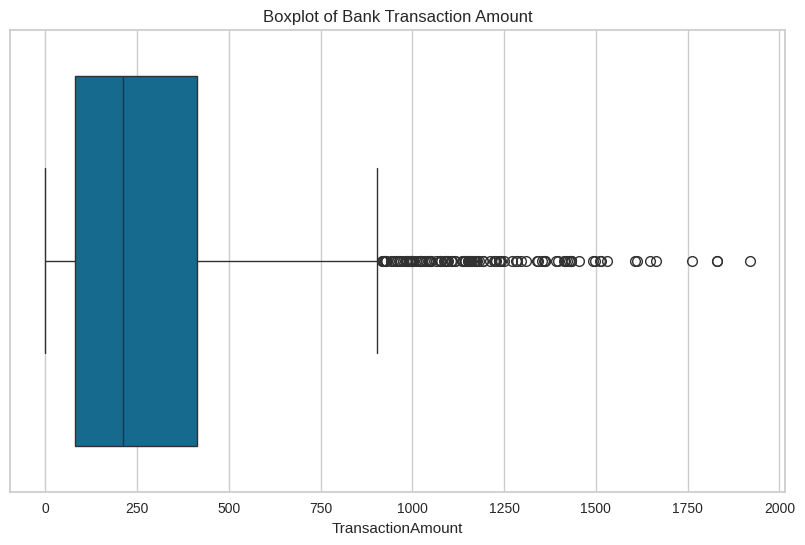

In [8]:
#Check Outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=BankTrans, x='TransactionAmount')
plt.title('Boxplot of Bank Transaction Amount')
plt.show()

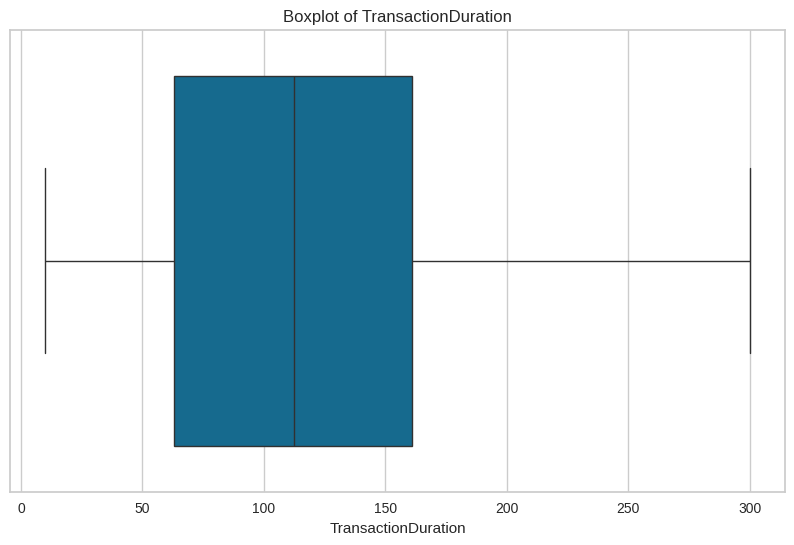

In [9]:
#Check Outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=BankTrans, x='TransactionDuration')
plt.title('Boxplot of TransactionDuration')
plt.show()

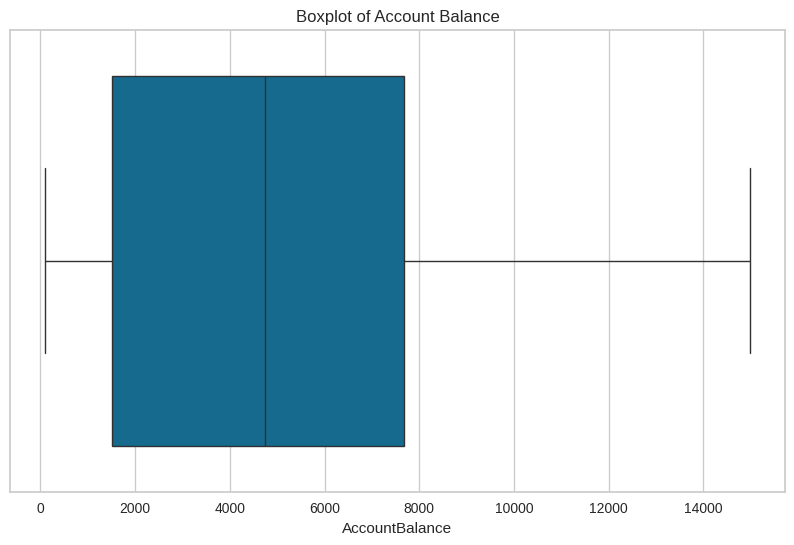

In [10]:
#Check Outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=BankTrans, x='AccountBalance')
plt.title('Boxplot of Account Balance')
plt.show()

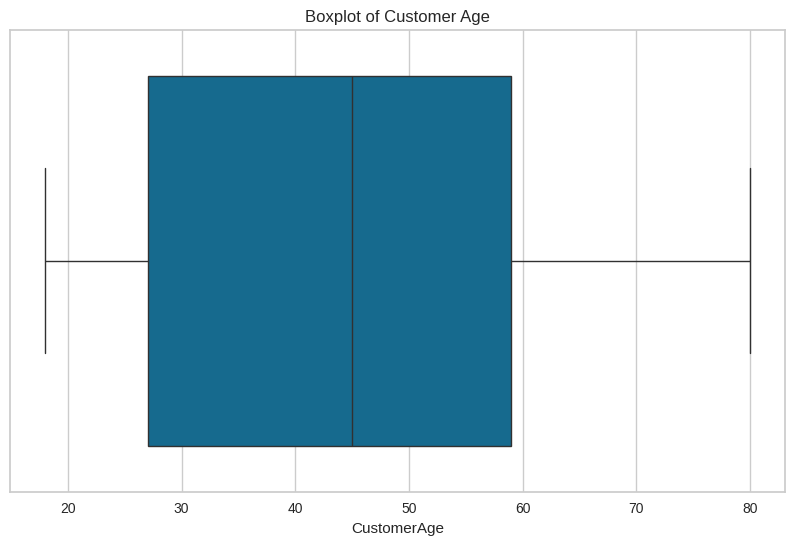

In [11]:
#Check Outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=BankTrans, x='CustomerAge')
plt.title('Boxplot of Customer Age')
plt.show()

### **Distribusi Data**

Distribusi Data TransactionAmount:


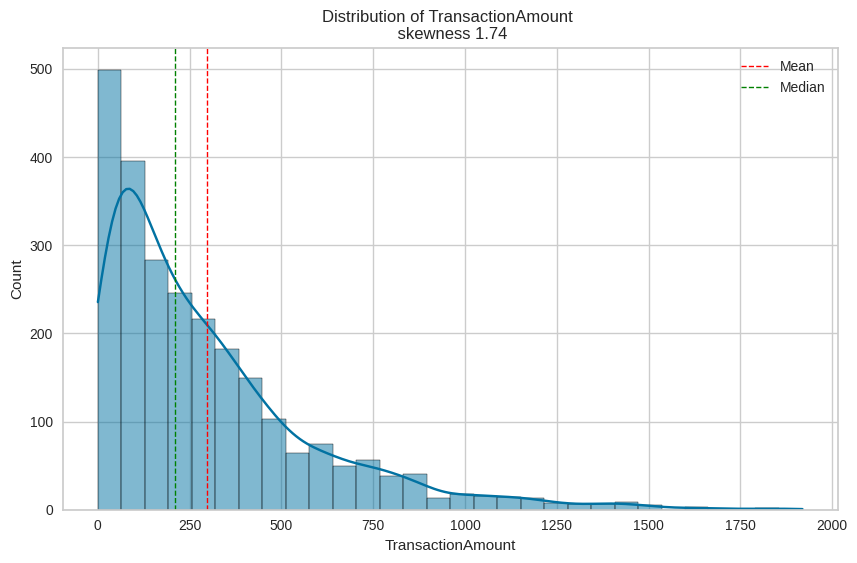

Distribusi Data CustomerAge:


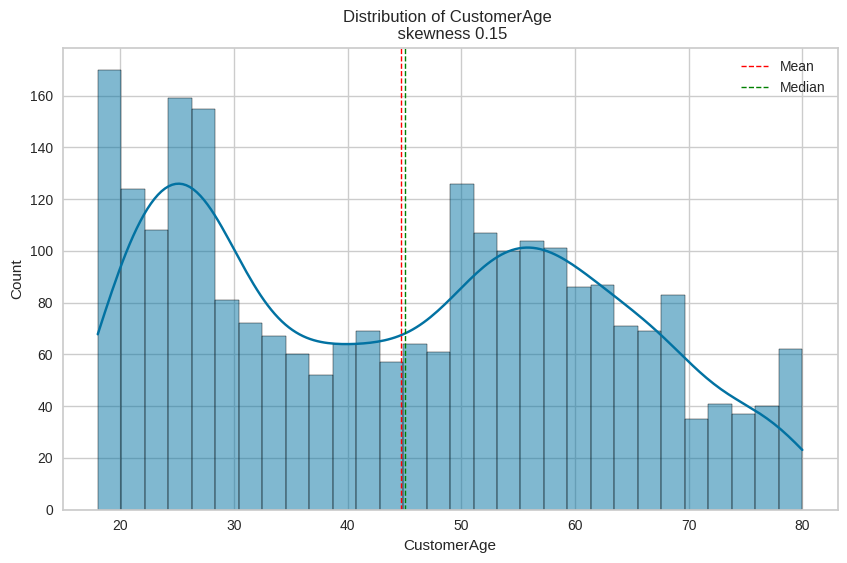

Distribusi Data TransactionDuration:


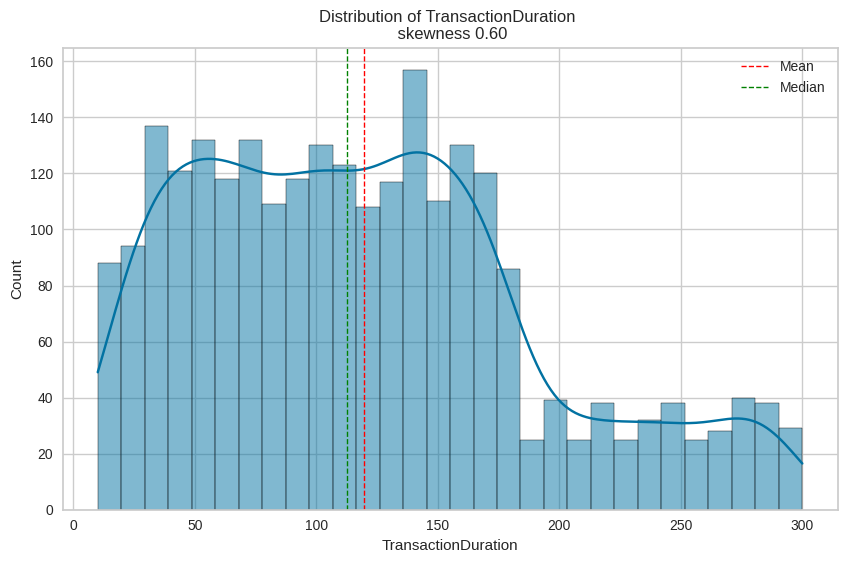

Distribusi Data LoginAttempts:


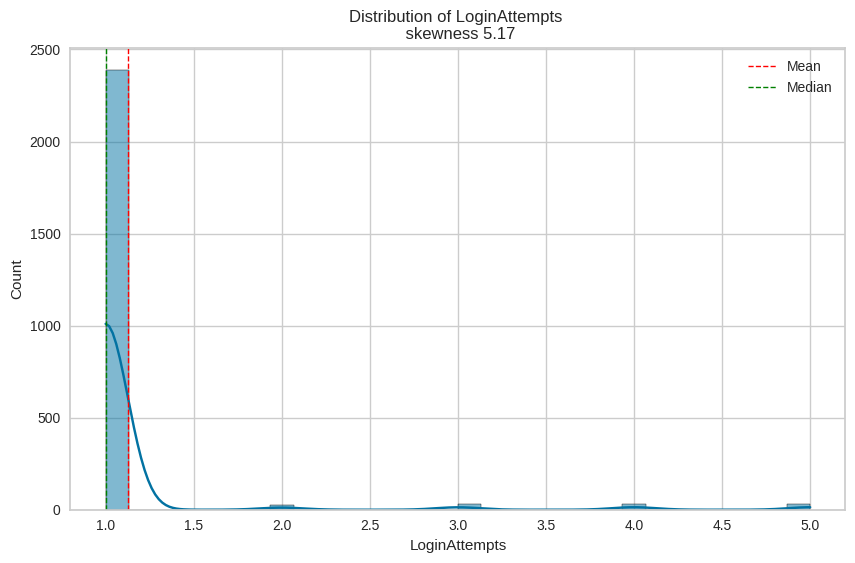

Distribusi Data AccountBalance:


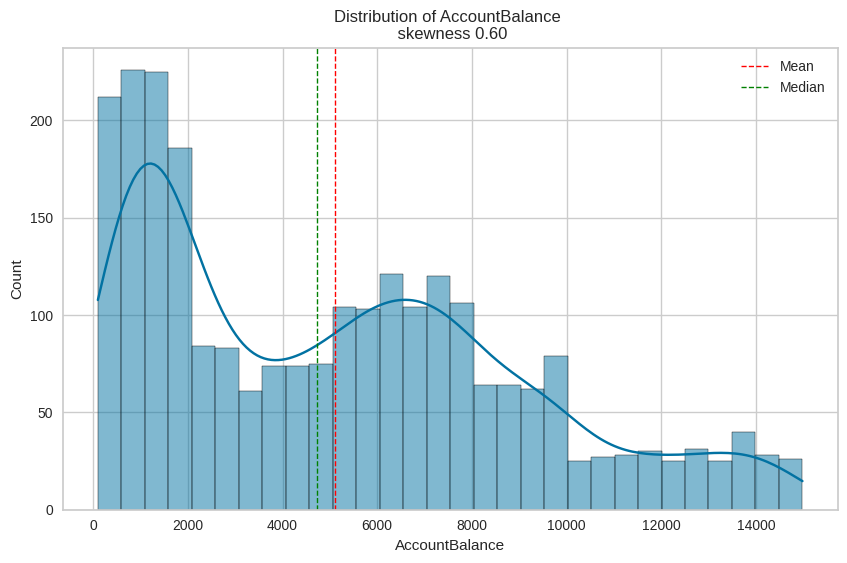

In [12]:
Feature = BankTrans.select_dtypes(include='number').columns

for i in Feature:
    print(f"Distribusi Data {i}:")
    skewness = BankTrans[i].skew()

    plt.figure(figsize=(10, 6))
    sns.histplot(BankTrans[i], kde=True, bins=30)
    plt.axvline(BankTrans[i].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(BankTrans[i].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
    plt.legend()
    plt.title(f'Distribution of {i} \n skewness {skewness:.2f}')
    plt.show()

### **Analysis Hubungan Antar Variable**

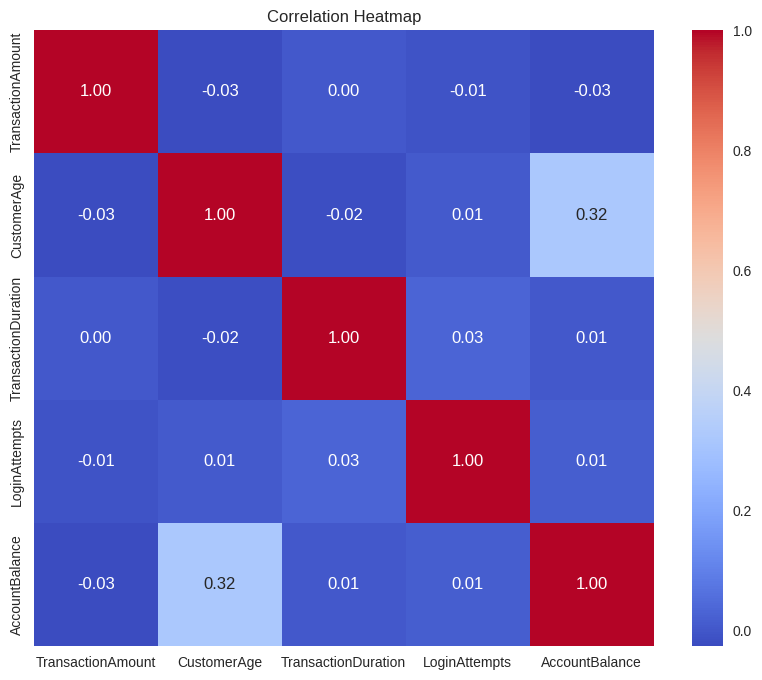

In [13]:
#Variable Heatmap
BankTrans_num = BankTrans.select_dtypes(include='number')

plt.figure(figsize=(10, 8))
sns.heatmap(BankTrans_num.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Text(0, 0.5, 'Customer Age')

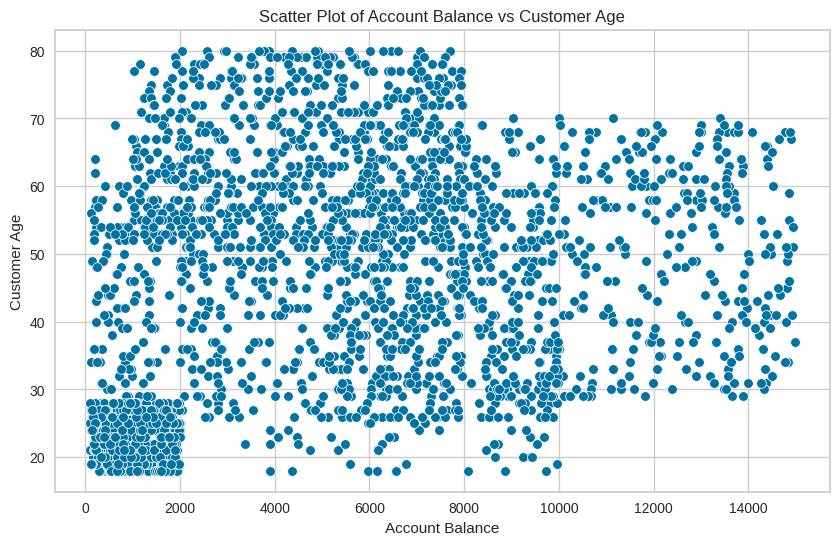

In [14]:
#Analysis Antara Atribut AccountBalance dan CustomerAge
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AccountBalance', y='CustomerAge', data=BankTrans)
plt.title('Scatter Plot of Account Balance vs Customer Age')
plt.xlabel('Account Balance')
plt.ylabel('Customer Age')

### **Visualisasi Data**

<ipython-input-15-22e50ffe0203>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=BankTrans['TransactionType'], data=BankTrans, palette='rocket')


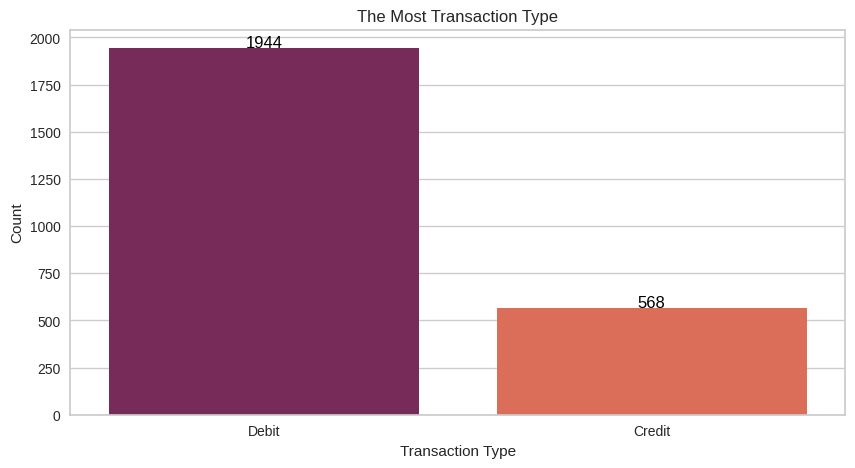

In [15]:
#The Most TransactionType
transaction_counts = BankTrans['TransactionType'].value_counts()

plt.figure(figsize=(10,5))
sns.countplot(x=BankTrans['TransactionType'], data=BankTrans, palette='rocket')

#Tampilkan Label Masing-Masing Category
for i, value in enumerate(transaction_counts.values):
    plt.text(i, value + 2, str(value), ha='center', fontsize=12, color='black')

plt.title('The Most Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

<ipython-input-16-e15e1b5ad454>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_counts.index, y=channel_counts.values, palette='Reds_r')


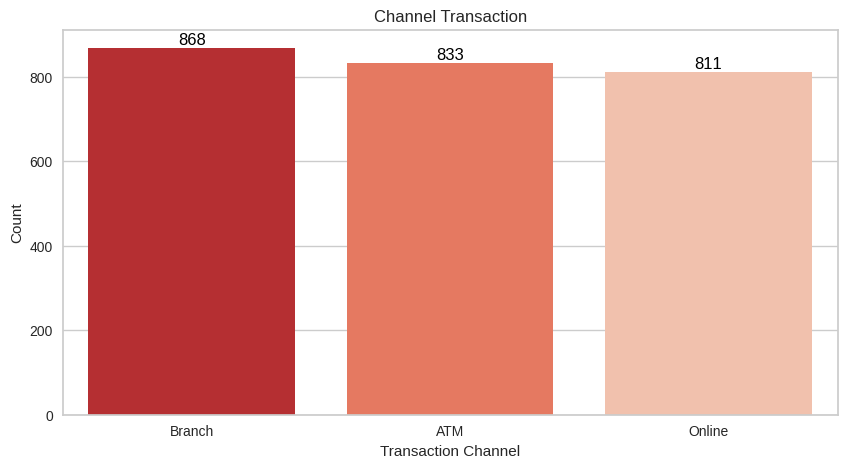

In [16]:
#Channel Transaction
channel_counts = BankTrans['Channel'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=channel_counts.index, y=channel_counts.values, palette='Reds_r')

for i, value in enumerate (channel_counts.values):
    plt.text(i, value + 2, str(value), ha='center', va='bottom', fontsize=12, color='black')

plt.title('Channel Transaction')
plt.xlabel('Transaction Channel')
plt.ylabel('Count')
plt.show()

<ipython-input-17-ff161e02a090>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupation_counts.values, y=occupation_counts.index, palette='Reds_r')


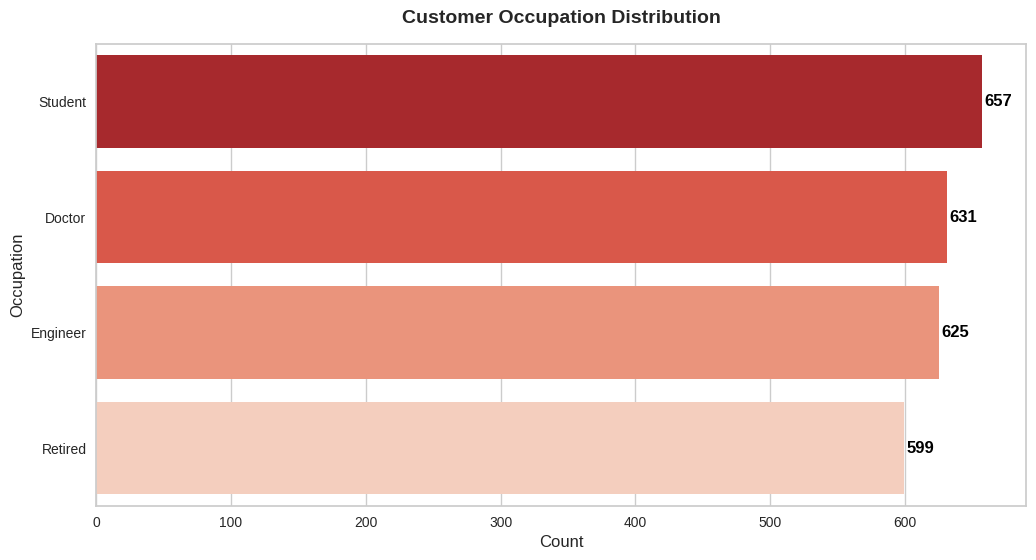

In [17]:
occupation_counts = BankTrans['CustomerOccupation'].value_counts()

plt.figure(figsize=(12, 6))

sns.barplot(x=occupation_counts.values, y=occupation_counts.index, palette='Reds_r')

# Tambahkan label pada masing-masing category
for i, value in enumerate(occupation_counts.values):
    plt.text(value + 2, i, str(value), va='center', fontsize=12, fontweight='bold', color='black')

plt.title("Customer Occupation Distribution", fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Occupation', fontsize=12)

plt.show()

**INSIGHT**

*   Tidak ditemukan adanya missing values ataupun duplikat data
*   Data berisikan 2511 baris dengan 16 kolom atribut dengan data berisikan data kategori dan data numerik (float, int)
*   Outlier ditemukan pada atribut data transaction amount
*   Terdapat hubungan yang kuat juga antara variable customerage dengan account balance, dimana customerage 20 - 29 tahun cenderung memiliki jumlah saldo yang sedikit
*   Transaksi yang dilakukan lebih banyak melalui bang cabang
*   Customer yang paling banyak melakukan transaksi adalah pelajar





# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

### **Handling Outlier**

Nilai Q1: 81.885
Nilai Q3: 414.52750000000003
Nilai IQR: 332.64250000000004
Lower Bound: -417.07875000000007
Upper Bound: 913.49125


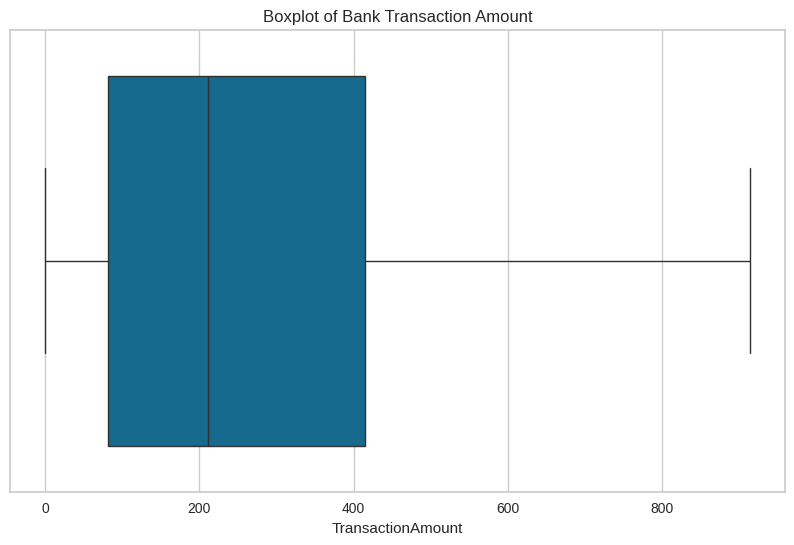

In [18]:
#TransactionAmount
Q1 = BankTrans['TransactionAmount'].quantile(0.25)
Q3 = BankTrans['TransactionAmount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Nilai Q1: {Q1}")
print(f"Nilai Q3: {Q3}")
print(f"Nilai IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

#Penerapan Metode Capping
BankTrans['TransactionAmount'] = np.where(BankTrans['TransactionAmount'] > upper_bound, upper_bound,
                                          np.where(BankTrans['TransactionAmount']< lower_bound, lower_bound, BankTrans['TransactionAmount']))

#Visualisasi Boxplot TransactionAmount
plt.figure(figsize=(10, 6))
sns.boxplot(data=BankTrans, x='TransactionAmount')
plt.title('Boxplot of Bank Transaction Amount')
plt.show()

### **Normalisasi Fitur**

In [19]:
scaler_amount = StandardScaler()
scaler_duration = StandardScaler()
scaler_balance = StandardScaler()
scaler_age = StandardScaler()

# Normalisasi Fitur Menggunakan StandardScaler
BankTrans['TransactionAmount'] = scaler_amount.fit_transform(BankTrans[['TransactionAmount']])
BankTrans['TransactionDuration'] = scaler_duration.fit_transform(BankTrans[['TransactionDuration']])
BankTrans['AccountBalance'] = scaler_balance.fit_transform(BankTrans[['AccountBalance']])
BankTrans['CustomerAge_sclr'] = scaler_age.fit_transform(BankTrans[['CustomerAge']])

print(BankTrans.head())

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128          -1.074361  2023-04-11 16:29:14   
1      TX000002   AC00455           0.362645  2023-06-27 16:44:19   
2      TX000003   AC00019          -0.629153  2023-07-10 18:16:08   
3      TX000004   AC00070          -0.398176  2023-05-05 16:32:11   
4      TX000005   AC00411          -1.076900  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor            -0.552443 

### **Binning**

In [20]:
bins = [18, 25, 35, 45, 55, 65, 80]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-80']

BankTrans['AgeGroup'] = pd.cut(BankTrans['CustomerAge'], bins=bins, labels=labels, right=False)
BankTrans.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,CustomerAge_sclr,AgeGroup
0,TX000001,AC00128,-1.074361,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,-0.552443,1,-0.000537,2024-11-04 08:08:08,1.423718,65-80
1,TX000002,AC00455,0.362645,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,0.305314,1,2.216472,2024-11-04 08:09:35,1.311287,65-80
2,TX000003,AC00019,-0.629153,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,-0.909842,1,-1.023534,2024-11-04 08:07:04,-1.443277,18-24
3,TX000004,AC00070,-0.398176,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,-1.353017,1,0.885797,2024-11-04 08:09:06,-1.049768,25-34
4,TX000005,AC00411,-1.076900,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,1.120184,1,0.593589,2024-11-04 08:06:39,-1.049768,25-34


<ipython-input-21-c125ea3c17af>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AgeGroup', data=BankTrans, palette='rocket')


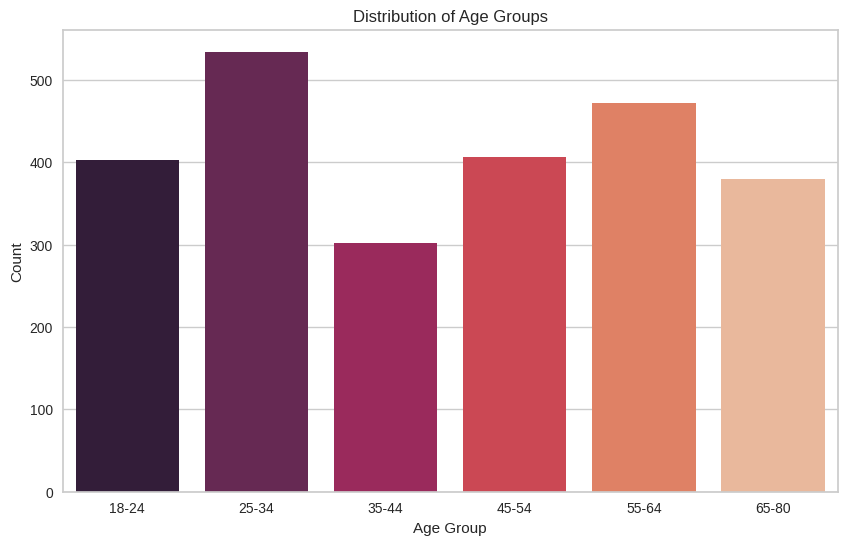

In [21]:
#Visualisasi kelompok umur
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', data=BankTrans, palette='rocket')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

###**Drop Kolom TransactionDate & PreviousTransactionDate**

In [22]:
BankTrans.drop(columns=['TransactionDate', 'PreviousTransactionDate'],inplace=True)

# Menampilkan hasil
BankTrans.head()

,TransactionID,AccountID,TransactionAmount,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_sclr,AgeGroup
0,TX000001,AC00128,-1.074361,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,-0.552443,1,-0.000537,1.423718,65-80
1,TX000002,AC00455,0.362645,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,0.305314,1,2.216472,1.311287,65-80
2,TX000003,AC00019,-0.629153,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,-0.909842,1,-1.023534,-1.443277,18-24
3,TX000004,AC00070,-0.398176,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,-1.353017,1,0.885797,-1.049768,25-34
4,TX000005,AC00411,-1.076900,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,1.120184,1,0.593589,-1.049768,25-34


###**Encoding Data Kategorikal**

In [23]:
# Pastikan LabelEncoder yang sama digunakan
label_encoders = {}

for col in ['TransactionID','AccountID','DeviceID','IP Address','MerchantID','TransactionType', 'Location', 'Channel', 'CustomerOccupation', 'AgeGroup']:
    le = LabelEncoder()
    BankTrans[col] = le.fit_transform(BankTrans[col])
    label_encoders[col] = le

BankTrans.head()

,TransactionID,AccountID,TransactionAmount,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_sclr,AgeGroup
0,0,126,-1.074361,1,36,365,186,14,0,70,0,-0.552443,1,-0.000537,1.423718,5
1,1,450,0.362645,1,15,50,82,51,0,68,0,0.305314,1,2.216472,1.311287,5
2,2,18,-0.629153,1,23,229,343,8,2,19,3,-0.909842,1,-1.023534,-1.443277,0
3,3,68,-0.398176,1,33,182,300,1,2,26,3,-1.353017,1,0.885797,-1.049768,1
4,4,406,-1.076900,0,1,298,501,90,2,26,3,1.120184,1,0.593589,-1.049768,1


In [24]:
BankTrans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionID        2512 non-null   int64  
 1   AccountID            2512 non-null   int64  
 2   TransactionAmount    2512 non-null   float64
 3   TransactionType      2512 non-null   int64  
 4   Location             2512 non-null   int64  
 5   DeviceID             2512 non-null   int64  
 6   IP Address           2512 non-null   int64  
 7   MerchantID           2512 non-null   int64  
 8   Channel              2512 non-null   int64  
 9   CustomerAge          2512 non-null   int64  
 10  CustomerOccupation   2512 non-null   int64  
 11  TransactionDuration  2512 non-null   float64
 12  LoginAttempts        2512 non-null   int64  
 13  AccountBalance       2512 non-null   float64
 14  CustomerAge_sclr     2512 non-null   float64
 15  AgeGroup             2512 non-null   i

**INSIGHT**

*   Dilakukan teknik capping pada outlier transactionamount agar informasi yang penting tidak dihapus
*   Dilakukan normalisasi fitur pada beberapa atribut menggunakan StandardScaler dikarenakan ditemukannya skewness > 0.5 pada distribusi data
*   Dilakukan pengelompokkan umur pada atribut CustomerAge
*   Dilakukan encoding pada data kategorikal

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

      TransactionAmount  AccountBalance  CustomerOccupation  CustomerAge  \
0             -1.074361       -0.000537                   0           70   
1              0.362645        2.216472                   0           68   
2             -0.629153       -1.023534                   3           19   
3             -0.398176        0.885797                   3           26   
4             -1.076900        0.593589                   3           26   
...                 ...             ...                 ...          ...   
2507           2.267159        1.942606                   0           33   
2508          -0.132163       -1.245986                   0           48   
2509          -1.016666       -0.443928                   2           56   
2510          -0.392343       -0.855705                   3           23   
2511          -0.165732       -1.277652                   3           24   

      TransactionType  
0                   1  
1                   1  
2              

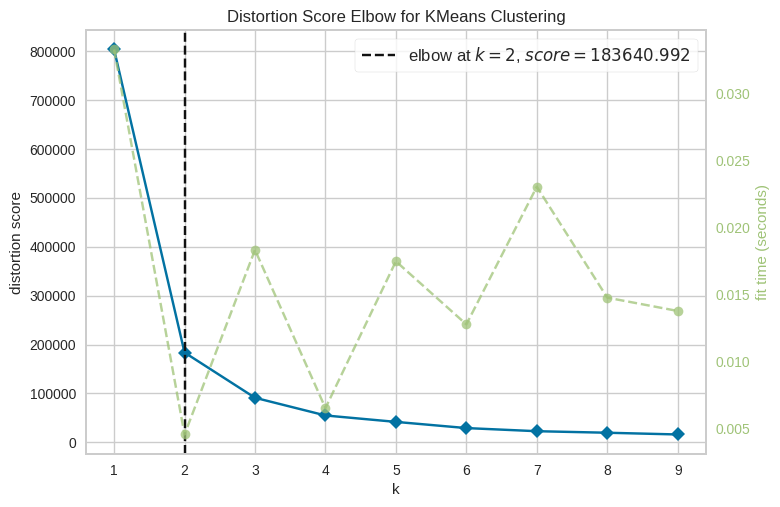

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
#Penerapan pada model clustering
x = BankTrans[['TransactionAmount','AccountBalance','CustomerOccupation','CustomerAge','TransactionType']]

#Tampilkan dalam bentuk dataframe
print(pd.DataFrame(x, columns=['TransactionAmount','AccountBalance','CustomerOccupation','CustomerAge','TransactionType']))

#Model Awal
kmeans = KMeans()

#Visualisasi Penentuan Jumlah Cluster
Visualize = KElbowVisualizer(kmeans, k=(1,10))

#Pencocokan cluster dengan data
Visualize.fit(x)
Visualize.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [26]:
#Inisialisasi Model dengan cluster optimal
k=2
kmeans = KMeans(n_clusters=k, random_state=42)

#Pencocokan cluster dengan data
kmeans.fit(x)

#Dapatkan label cluster
labels = kmeans.labels_

def analyze_clusters(x, labels, k):
  print("Analisis Karakteristik Cluster")
  for i in range(k):
    cluster_data = x[labels == i]
    print(f"\nCluster {i}:")
    print(cluster_data.describe())

    #Rata-rata fitur dalam cluster
    cluster_means = cluster_data.mean()
    print("\nRata-rata Fitur dalam Cluster:")
    print(cluster_means)

analyze_clusters(x, labels, k)

Analisis Karakteristik Cluster

Cluster 0:
       TransactionAmount  AccountBalance  CustomerOccupation  CustomerAge  \
count        1274.000000     1274.000000         1274.000000  1274.000000   
mean           -0.026723        0.248142            1.166405    60.153846   
std             0.987777        0.912215            0.864197     9.199023   
min            -1.126936       -1.280308            0.000000    45.000000   
25%            -0.813773       -0.506207            0.000000    53.000000   
50%            -0.310940        0.200593            1.000000    59.000000   
75%             0.420806        0.732177            2.000000    67.000000   
max             2.494450        2.520015            2.000000    80.000000   

       TransactionType  
count      1274.000000  
mean          0.752747  
std           0.431584  
min           0.000000  
25%           1.000000  
50%           1.000000  
75%           1.000000  
max           1.000000  

Rata-rata Fitur dalam Cluster:
Transa

In [27]:
#Hitung Silhouette Score
silhouette_avg = silhouette_score(x, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.65


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

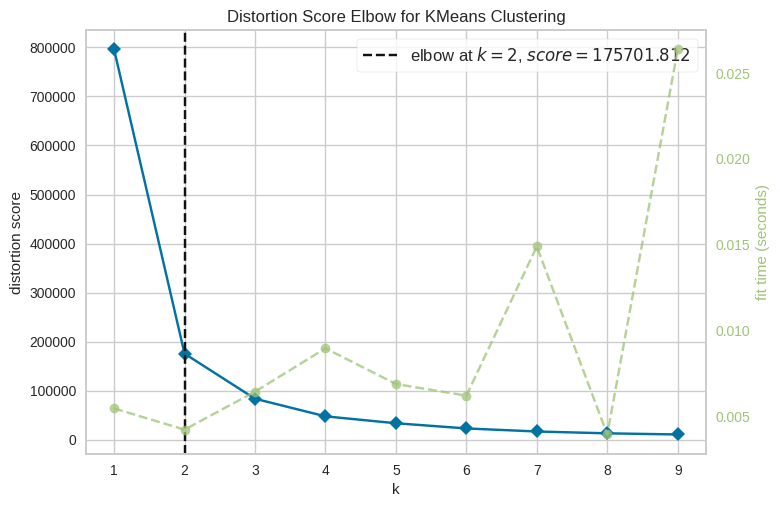

Silhouette Score: 0.67
Number of Components: 1, Silhouette Score: 0.67
Number of Components: 2, Silhouette Score: 0.66
Number of Components: 3, Silhouette Score: 0.65
Number of Components: 4, Silhouette Score: 0.65
Number of Components: 5, Silhouette Score: 0.65


In [28]:
#Penerapan PCA Pada Pemilihan Fitur
x = BankTrans[['TransactionAmount','AccountBalance','CustomerOccupation','CustomerAge','TransactionType']]

pca = PCA(n_components=0.90)
pca_result = pca.fit_transform(x)

#Penerapan pada model
kmeans = KMeans()
Visualize = KElbowVisualizer(kmeans, k=(1,10))
Visualize.fit(pca_result)
Visualize.show()

#Input kedalam model
k=2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pca_result)
pca_labels = kmeans.labels_

silhouette_avg = silhouette_score(pca_result, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

#Lakukan perulangan terhadap PCA dalam model
for n_components in range(1, len(x.columns) + 1):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(x)

    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)

    labels = kmeans.labels_

    silhouette_avg = silhouette_score(pca_result, labels)
    print(f"Number of Components: {n_components}, Silhouette Score: {silhouette_avg:.2f}")

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

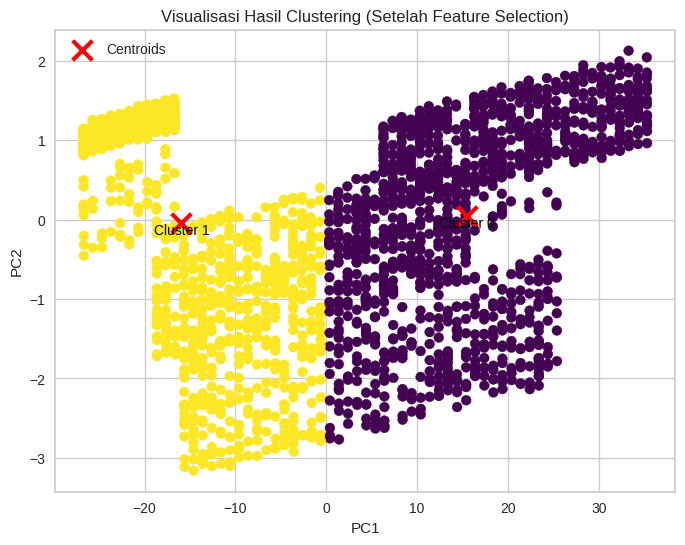

In [29]:
# Reduksi dimensi menggunakan PCA untuk visualisasi 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x)

# Visualisasi Hasil Clustering Setelah Feature Selection
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=pca_labels, cmap='viridis', s=50)
plt.title('Visualisasi Hasil Clustering (Setelah Feature Selection)')
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.colorbar(label='Cluster')

# Plot centroid
centroids_pca = kmeans.cluster_centers_
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='x', s=200, linewidths=3, color='red', label='Centroids')
for i, centroid in enumerate(centroids_pca):
    plt.annotate(f'Cluster {i}', (centroid[0], centroid[1]), fontsize=10, color='black', ha='center', va='top')
plt.legend()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [31]:
# Type your code here
BankTrans.head()

,TransactionID,AccountID,TransactionAmount,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_sclr,AgeGroup
0,0,126,-1.074361,1,36,365,186,14,0,70,0,-0.552443,1,-0.000537,1.423718,5
1,1,450,0.362645,1,15,50,82,51,0,68,0,0.305314,1,2.216472,1.311287,5
2,2,18,-0.629153,1,23,229,343,8,2,19,3,-0.909842,1,-1.023534,-1.443277,0
3,3,68,-0.398176,1,33,182,300,1,2,26,3,-1.353017,1,0.885797,-1.049768,1
4,4,406,-1.076900,0,1,298,501,90,2,26,3,1.120184,1,0.593589,-1.049768,1


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [32]:
# Type your code here
BankTrans['Cluster'] = kmeans.labels_

# Lakukan Inverse Transform pada fitur yang sudah dilakukan Label Encoding
for col, le in label_encoders.items():
  BankTrans[col] = le.inverse_transform(BankTrans[col])

# Inverse Transform Normalisasi dengan scaler masing-masing
BankTrans['TransactionAmount'] = scaler_amount.inverse_transform(BankTrans[['TransactionAmount']])
BankTrans['CustomerAge'] = scaler_age.inverse_transform(BankTrans[['CustomerAge_sclr']])
BankTrans['AccountBalance'] = scaler_balance.inverse_transform(BankTrans[['AccountBalance']])
BankTrans['TransactionDuration'] = scaler_duration.inverse_transform(BankTrans[['TransactionDuration']])

BankTrans.head()

,TransactionID,AccountID,TransactionAmount,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_sclr,AgeGroup,Cluster
0,TX000001,AC00128,14.09,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1,5112.21,1.423718,65-80,0
1,TX000002,AC00455,376.24,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1,13758.91,1.311287,65-80,0
2,TX000003,AC00019,126.29,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1,1122.35,-1.443277,18-24,1
3,TX000004,AC00070,184.50,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1,8569.06,-1.049768,25-34,1
4,TX000005,AC00411,13.45,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26.0,Student,198.0,1,7429.40,-1.049768,25-34,1


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

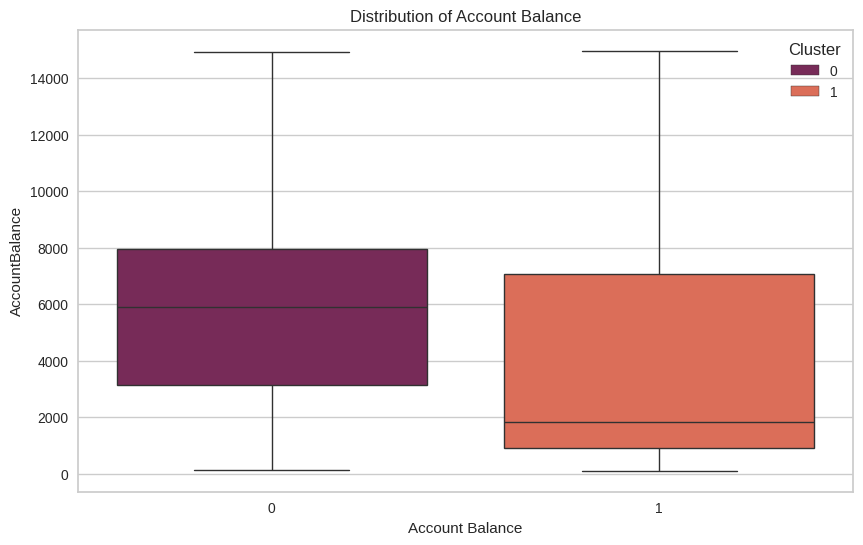

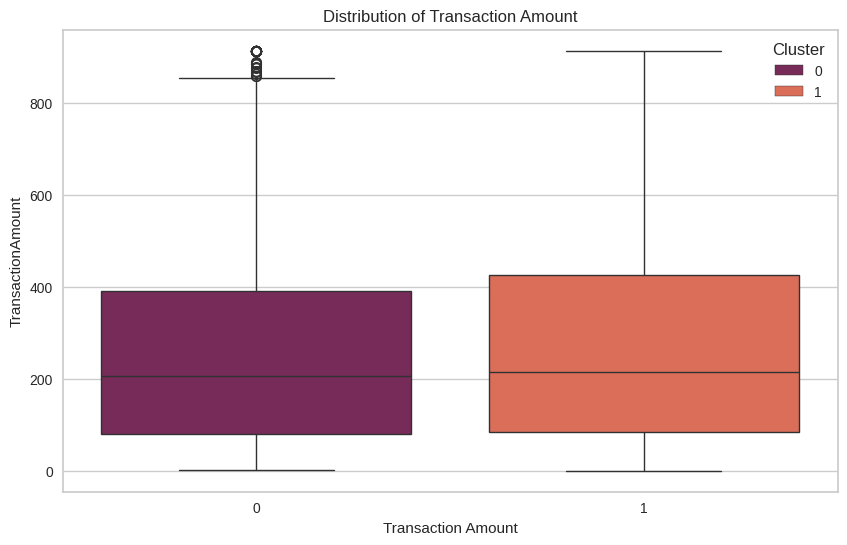

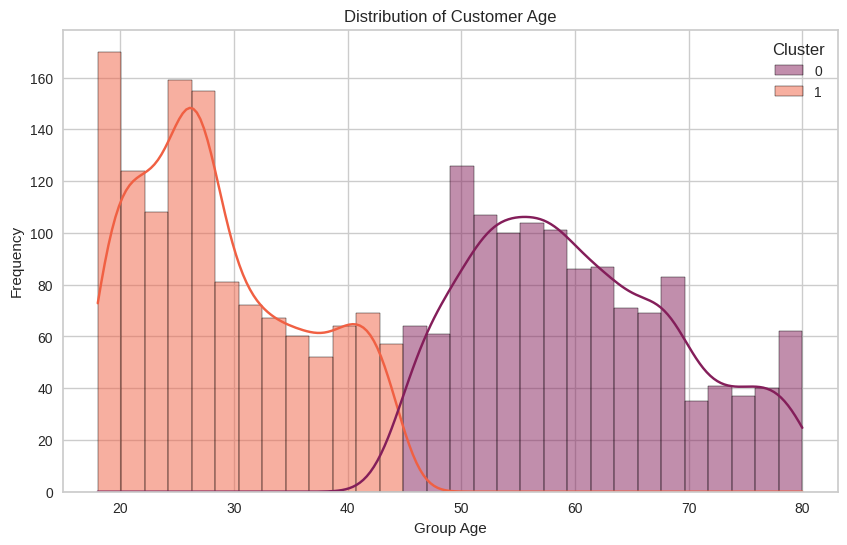

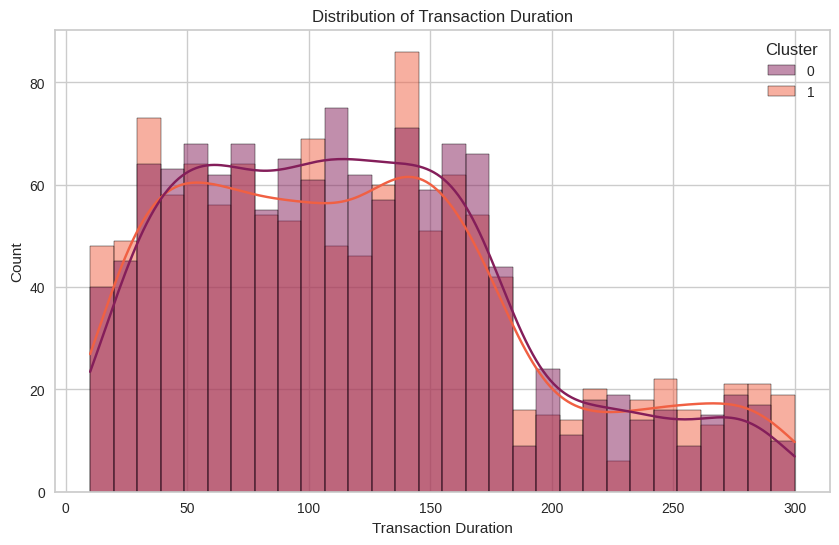

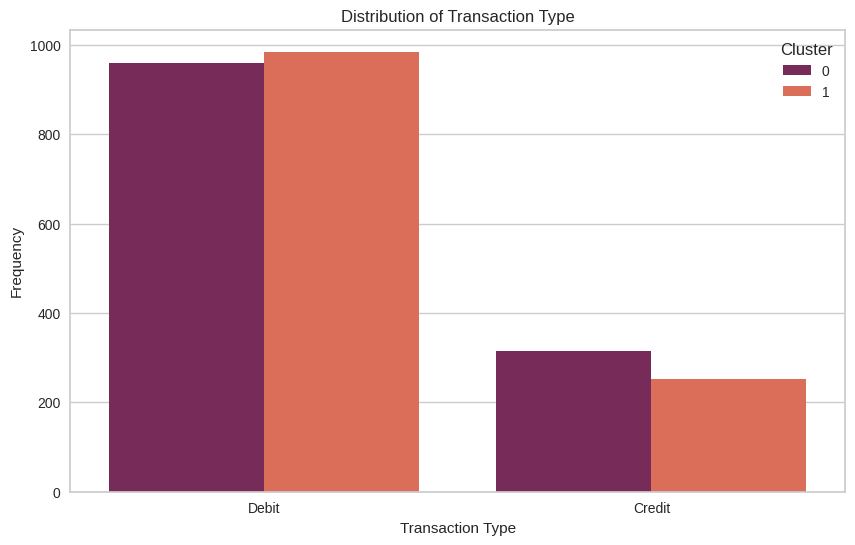

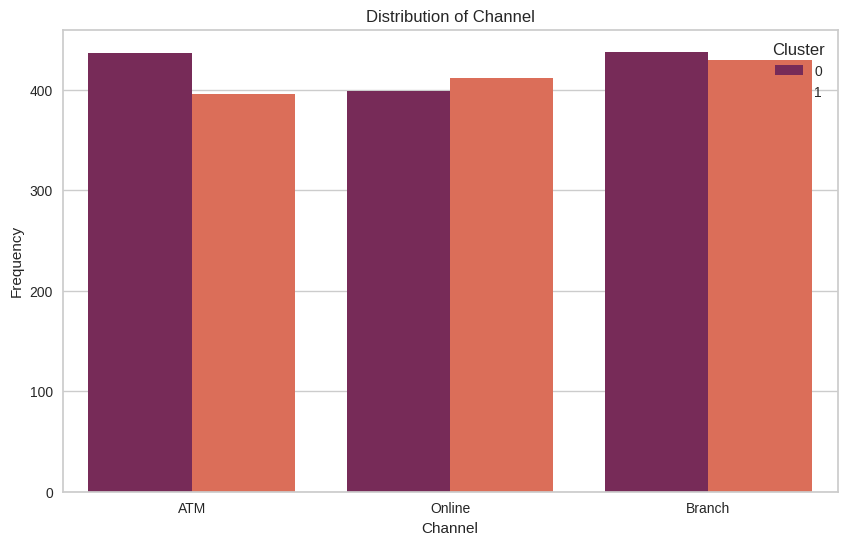

In [33]:
#Distribusi Account Balance
plt.figure(figsize=(10, 6))
sns.boxplot(data=BankTrans, y='AccountBalance', x='Cluster', hue='Cluster', palette='rocket')
plt.title('Distribution of Account Balance')
plt.xlabel('Account Balance')

#Distribusi Transaction Amount
plt.figure(figsize=(10, 6))
sns.boxplot(data=BankTrans, y='TransactionAmount', x='Cluster', hue='Cluster', palette='rocket')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')

# Distribusi Data Usia Customer
plt.figure(figsize=(10, 6))
sns.histplot(data=BankTrans, x='CustomerAge', kde=True, bins=30, hue='Cluster', palette='rocket')
plt.title('Distribution of Customer Age')
plt.xlabel('Group Age')
plt.ylabel('Frequency')
plt.show()

#Distribusi TransactionDuration
plt.figure(figsize=(10, 6))
sns.histplot(data=BankTrans, x='TransactionDuration', kde=True, bins=30, hue='Cluster', palette='rocket')
plt.title('Distribution of Transaction Duration')
plt.xlabel('Transaction Duration')

#Distribusi TransactionType
plt.figure(figsize=(10, 6))
sns.countplot(data=BankTrans, x='TransactionType', hue='Cluster', palette='rocket')
plt.title('Distribution of Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Frequency')
plt.show()

#Distribusi Channel
plt.figure(figsize=(10, 6))
sns.countplot(data=BankTrans, x='Channel', hue='Cluster', palette='rocket')
plt.title('Distribution of Channel')
plt.xlabel('Channel')
plt.ylabel('Frequency')
plt.show()

## 1. Cluster 1:
Karakteristik:
*   Customer di cluster ini rata-rata memiliki **50-80 Tahun**
*   Customer ini melakukan transaksi paling sering menggunakan **ATM** dan **Bank Cabang**
*   Durasi transaksi dilakukan tergolong standar **55 - 150 detik**
*   Saldo akun berada di golongan menengah yaitu sekitar **3.500 - 8.000**

# Interpretasi:
Customer di cluster ini merupakan customer yang masih suka melakukan transaksi baik melalui ATM, Bank Cabang ataupun melalui ATM yang mungkin lebih teraman dan lebih membutuhkan uang bentuk tunai, Customer ini rata-rata orang yang sudah pensiun dari kerjaanya dan **lebih banyak transaksi uang masuk (debit)** dibandingkan uang keluar (kredit).

## 2. Cluster 2:
Karakteristik:
*   Customer di cluster memiliki rentang usia **18 - 45 tahun**
*   Saldo akun yang dimiliki sekitar **2500 - 6500**,
*   Customer ini melakukan transaksi paling sering menggunakan **Online** ataupun **Bank Cabang**
*   Durasi transaksi dilakukan tergolong cepat **48 - 150 detik**

# Interpretasi:
Customer di cluster ini merupakan seorang mahasiswa ataupun seorang yang baru bekerja yang sedang suka melakukan transaksi dengan pemasukan uang kedalam rekening tergolong tinggi dibandingkan cluster 1, Customer ini lebih suka melakukan transaksi melalui Online ataupun Bank Cabang yang mungkin lebih aman dan terjamin serta lebih cepat dibandingkan melalui ATM.

# KESIMPULAN:

### Cluster 1 lebih cocok sebagai target cluster dalam pelayanan premium dan juga keamanan tingkat tinggi

### Cluster 2 lebih cocok sebagai target cluster dalam hal promo ketika transaksi menggunakan metode tertentu

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [34]:
BankTrans.to_csv("Transaksi_clustering.csv", index=False)